# What are the main Assumptions of Linear Regression? 

Linear regression relies on several assumptions to ensure the validity and reliability of the model's results. 

Here are the **Top 5 Assumptions of Linear Regression**:


* **Linearity**: The relationship between the dependent and independent variables should be linear.
* **No multicollinearity**: The independent variables should not be highly correlated with each other.
* **Homoscedasticity**: The variance of the errors is constant across all levels of the independent variables.
* **Normality**: The errors follow a normal distribution.
* **Autocorrelation of Residuals**: There is no relationship between the errors and the predicted variables.

Let's explore these in detail with real-life dataset.

# Problem Statement

ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States 2010. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

## Data Importing and Understanding

In [1]:
import pandas as pd

In [2]:
# Now creating a Pandas dataframe

acme_data = pd.read_csv("acme_dataset.csv")
acme_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
acme_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


So, "age", "children", "bmi" (body mass index) and "charges" are numbers, whereas "sex", "smoker" and "region" are strings (possibly categories).

Further, None of the columns contain any missing values meaning our dataset is clean.


#### Checking our Numerical Data


In [4]:
acme_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Some references are:
1. age : 
        
        a. The minimum age is 18. 
        b. The maximum age is 64.

    It can be argued that maybe this Insurance Company can only take applications between the 18-64 ages.

2. bmi : The "bmi" lies from "underweight" i.e. 15.96 to "obesity range" i.e. 53.13

3. children: Some of our customers even have maximum 5 childrens which is fine as the mean of having children is 1.

4. charges: The "charges" column seems to be significantly skewed meaning there can be the outliers in this column as the minimum charges falls in 1K whereas maximum and even the the median (i.e. 50 percentile) is much lower than the maximum value

#### Checking sex and count


In [5]:
acme_data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

Fairly the "sex" distribution is similar among both the sex. Later we can see if we want to standarize it for our model.

#### Checking smoker's count


In [6]:
acme_data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

The "smoker" distribution suggests that we have large number of people who don't smoke.

#### Checking unique regions and customers count


In [7]:
acme_data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

This shows wee have maximum customers from "southeast " region and minimum from "northeast". 

## Exploratory Analysis and Visualization


In [8]:
# Importing viz libraries
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Univariate Analysis

### Age

Let's plot a histogram and a box plot for "age". As the minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins ((64-18) + 1) (one for each year).

In [8]:
fig = px.histogram(acme_data,
                   x = "age",
                   nbins = 47,
                   title = 'Distribution of Age',
                   color_discrete_sequence= ["goldenrod"])

fig.update_layout(bargap=0.1)
fig.show()

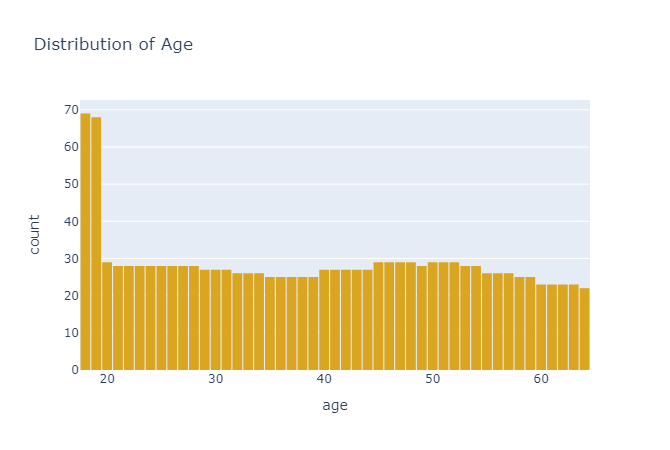

#### Observation Made:

The "age" distribution in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the number of people of any given age (between 18 & 64) in the USA.

**Guess with reason:**

> There are over twice as many customers with ages 18 and 19, compared to other ages because:
>> Since 18-19 is the legal age the insurance company may be asking for lower interest rates for people in this age group because of which the individuals are more interested in applying for Medical insurance.

### Body Mass Index

Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [16]:
fig = px.histogram(acme_data, 
                   x = "bmi",
                   color_discrete_sequence=['turquoise'], 
                   title='Distribution of Body Mass Index (BMI)')

fig.update_layout(bargap=0.1)
fig.show()

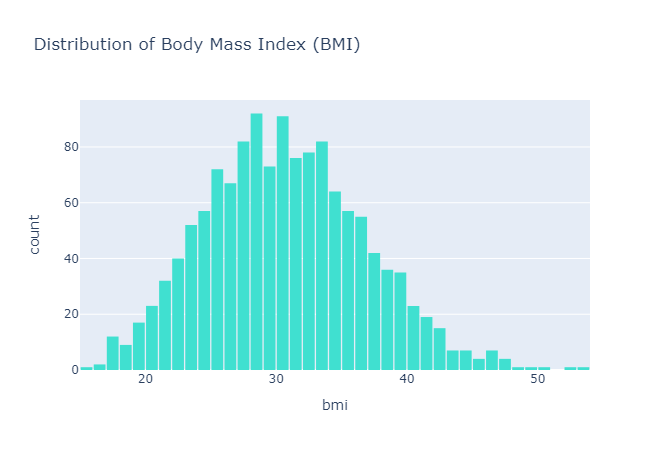

#### Observation made: 

The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right.

> Question: Why the distribution of "ages" forms a "uniform distribution" while the distribution of "BMIs" forms a "gaussian distribution"?
>> It may be influenced by various factors including the characteristics of the populations being studied and the underlying processes that contribute to the variables. But the reasons that I can think is : The uniform distribution for ages can have relatively consistent representation of individuals across different age ranges. But the gaussian distribution for BMIs is influenced by multiple factors such as genetics, lifestyle, diet, and overall health.

The Central Limit Theorem suggests that the distribution of the sum (or average) of a large number of independent, identically distributed random variables, each with finite mean and variance, approaches a normal distribution. The various factors influencing BMI could contribute to a Gaussian-like distribution.

### Charges According to Smoking Habit

Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict.

Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [17]:
fig = px.histogram(acme_data, 
                   x='charges', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges: with Smoking Habit')

fig.update_layout(bargap=0.1)
fig.show()

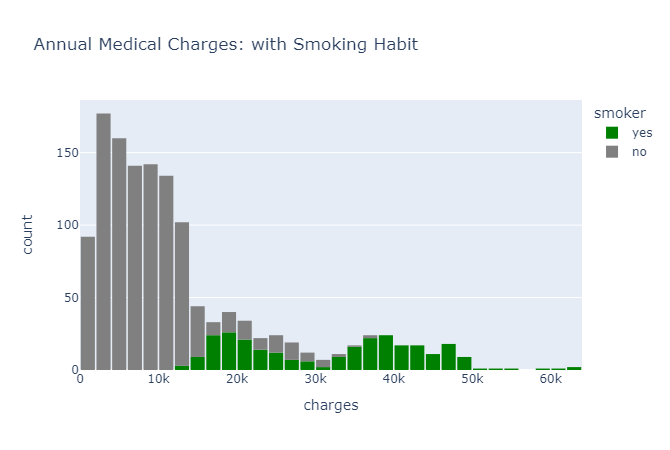

We can make the following observations from the above graph:

* For most customers, the annual medical charges are under $10,000. Only a small fraction of customer have higher medical expenses, possibly due to major accidents, illnesses or genetical diseases. The distribution follows a "power law".
* There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is $7300, the median for smokers is close to $35,000.


### Charges According to Region

Let's also use the categorical column "region" to distinguish the charges for all the 4 regions.

In [18]:
fig = px.histogram(acme_data, 
                   x='charges', 
                   color='region', 
                   color_discrete_sequence=px.colors.sequential.Plasma_r, 
                   title='Annual Medical Charges: with Region')

fig.update_layout(bargap=0.1)
fig.show()

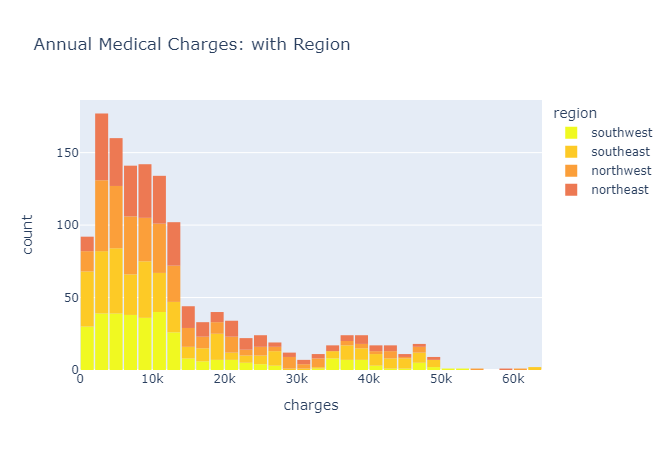

We can make the following observations from the above graph:

* For most customers, the annual medical charges are under $20,000. Only a small fraction of customer have higher medical expenses, possibly due to major accidents, illnesses or genetical diseases.
* There is no significant difference in medical expenses between the 4 regions as the median is between 8k- 10k expenses.

### Charges According to Sex

Let's also use the categorical column "sex" to distinguish the charges for males and females.

In [19]:
fig = px.histogram(acme_data, 
                   x='charges', 
                   color='sex', 
                   color_discrete_sequence=px.colors.sequential.Rainbow, 
                   title='Annual Medical Charges: with Sex')

fig.update_layout(bargap=0.1)
fig.show()

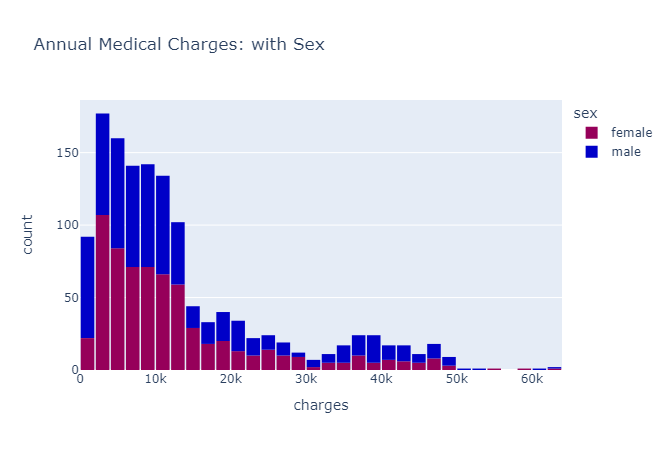

We can make the following observations from the above graph:

* For most of our female customers, the annual medical charges are under $12K-14k.
* But I couldn't able to identify why males have the annual medical charges are high including some outliers too.

## 1. Linear Relationship: 

The relationship between the independent variables (predictors) and the dependent variable (response) should be approximately linear. This means that the change in the response variable should be proportional to changes in the predictor variables. (Bivariate Analysis)

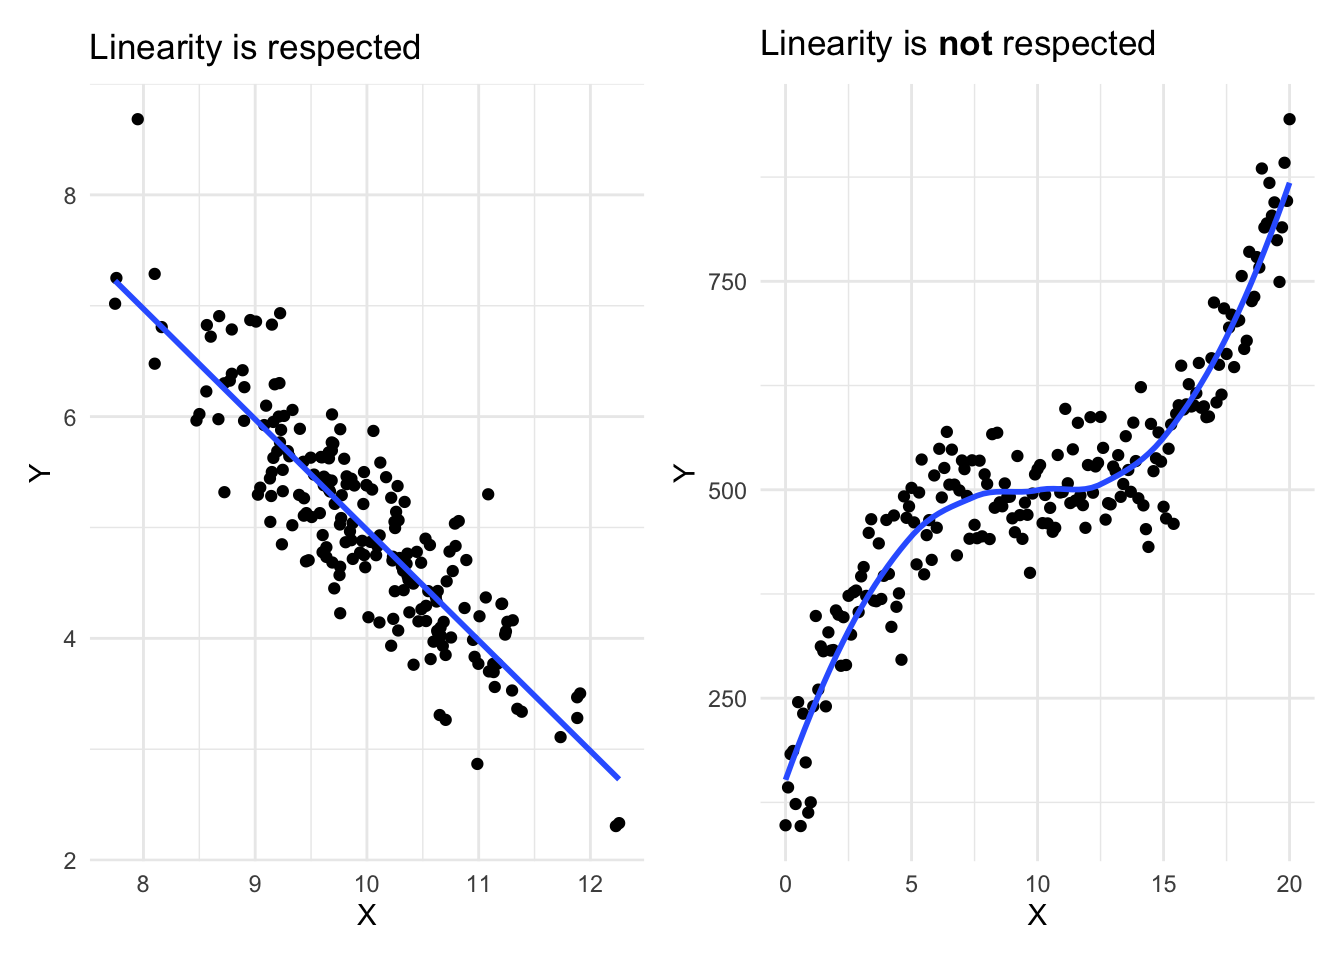

-- This assumption can be verified by examining scatter plots of the variables or by using techniques like residual plots.

### Age and Charges
Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [20]:
fig = px.scatter(acme_data, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')

fig.update_traces(marker_size=5)
fig.show()

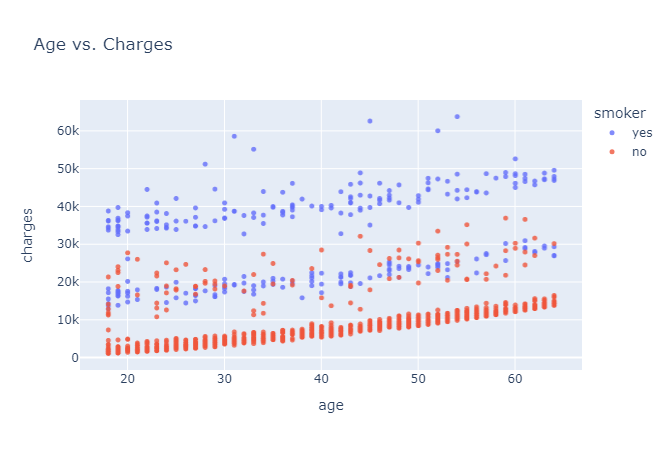

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.


### BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.
     

In [21]:
fig = px.scatter(acme_data, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

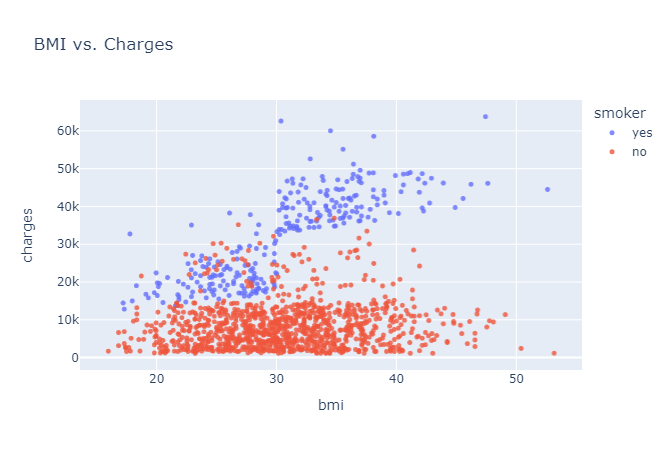

#### Main Observation:

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

### Children vs. Charges

In [22]:
fig = px.violin(acme_data, 
                 x='children', 
                 y='charges',
                 title='Children vs. Charges')

fig.update_traces(marker_size=5)
fig.show()

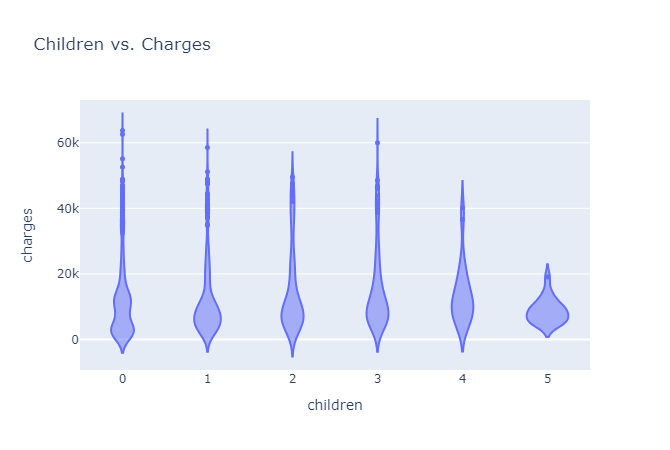
#### Observations drawn are:

1. People with Zero Children are paying greater annual charges.
2. People with 5 Children have taken the insurance but the average cost is even lesser than $10K.
3. The biggest cluster of violin lies in under $20K.

## Train/ Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_inputs,test_inputs,train_target,test_target = train_test_split(acme_data.drop(columns=["charges"]), acme_data["charges"], test_size=0.2, random_state=42)

In [14]:
train_inputs.shape

(1070, 6)

In [14]:
train_inputs

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [15]:
test_inputs.shape

(268, 6)

## 2. No Multicollinearity in the Data

There should be no perfect multicollinearity among the independent variables. Perfect multicollinearity occurs when one predictor variable is a perfect linear function of one or more other predictor variables. It can lead to unstable estimates of the regression coefficients. 


-- Multicollinearity can be detected using techniques like variance inflation factor (VIF) or correlation matrices.

### Method 1: Variance Inflation Factor (VIF)

It is a statistical concept that indicates the increase in the variance of a regression coefficient as a result of collinearity. It measures the severity of multicollinearity in regression analysis. 

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
selected_columns = train_inputs[['age', 'bmi', 'children']]

# Calculating VIF for each column
vif = pd.DataFrame()
vif["Feature"] = selected_columns.columns
vif["VIF"] = [variance_inflation_factor(selected_columns.values, i) for i in range(selected_columns.shape[1])]

print(vif)

    Feature       VIF
0       age  7.681514
1       bmi  7.870678
2  children  1.800725


 Typically, a VIF value greater than 5 or 10 indicates high multicollinearity, suggesting that the feature may be redundant in the presence of other features. 
 
 In this case, 'age' and 'bmi' have VIF values close to the threshold, indicating some degree of multicollinearity, while 'children' has a lower VIF value, suggesting less multicollinearity.

### Method 2: Correlation Matrix

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.

In [9]:
acme_data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

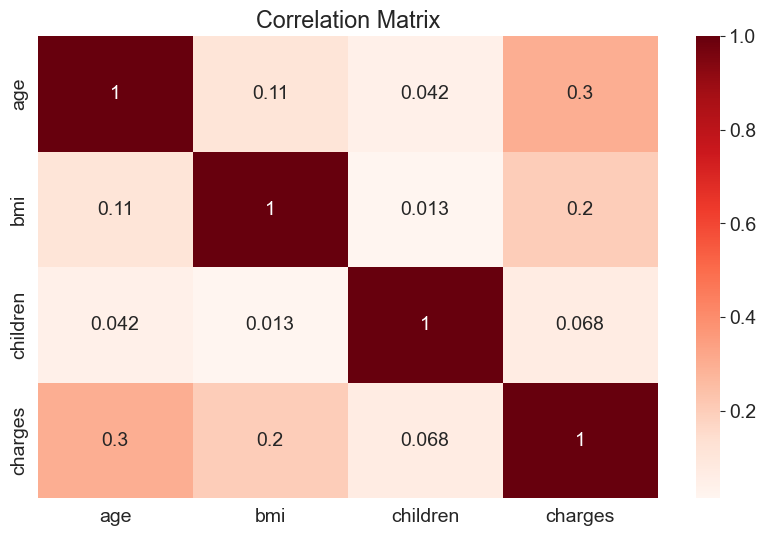

In [10]:
# The result of .corr is called a correlation matrix and is often visualized using a heatmap.
sns.heatmap(acme_data.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

As expected, "age" and "charges" are slightly more correlated, whereas "bmi" and "children", "charges" don't.

Further, none of the correlation coefficients are close to 1 or -1, indicating an absence of strong multicollinearity among the variables. Multicollinearity occurs when independent variables in a regression model are highly correlated with each other, which can cause issues with parameter estimation.

**Correlation vs causation fallacy:** 

Note: A high correlation cannot be used to interpret a cause-effect relationship between features. Two features $X$ and $Y$ can be correlated if $X$ causes $Y$ or if $Y$ causes $X$, or if both are caused independently by some other factor $Z$.

Causation indicates that one event is the result of the occurrence of the other event and the Correlation will no longer hold true if one of the cause-effect relationships is broken. 

It's also possible that $X$ are $Y$ simply appear to be correlated because the sample is too small. 

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.

## Transformer Implementation

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [24]:
trf1 = ColumnTransformer(transformers=[
    # One Hot Encoding

    ("ohe_sex", OneHotEncoder(sparse_output= False, handle_unknown="ignore", drop= "first"),[1]),
    ("ohe_smoker", OneHotEncoder(sparse_output= False, handle_unknown="ignore", drop= "first"),[4]),
    ("ohe_region", OneHotEncoder(sparse_output= False, handle_unknown="ignore", drop= "first"),[5]),
    # *Handle unknown categories with OneHotEncoder by encoding them as zeros*
    
],remainder="passthrough")

In [25]:
trf1.get_params


<bound method ColumnTransformer.get_params of ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_sex',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 [1]),
                                ('ohe_smoker',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 [4]),
                                ('ohe_region',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 [5])])>

In [26]:
from sklearn.preprocessing import MinMaxScaler


In [27]:
# Scaling
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,8)) # Use column count
])

### Linear Regression 

In [21]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [31]:
pipe = Pipeline([
        ("trf1", trf1),
        ("trf2", trf2),
        ("clf", lr)
    ])

In [32]:
pipe.fit(train_inputs, train_target)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1]),
                                                 ('ohe_smoker',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [4]),
                                                 ('ohe_region',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 8, None))])),
                ('clf', LinearRegression())])

In [33]:
# Residual
test_pred = pipe.predict(test_inputs)

print("r2score", r2_score(test_target,test_pred))


r2score 0.7835929767120723


In [36]:
residual = test_target - test_pred

## 3. Normality of Residual/ Errors

The residual or errors should be normally distributed. While the normality assumption is not necessary for unbiased estimation of coefficients, it is crucial for hypothesis testing and constructing confidence intervals.

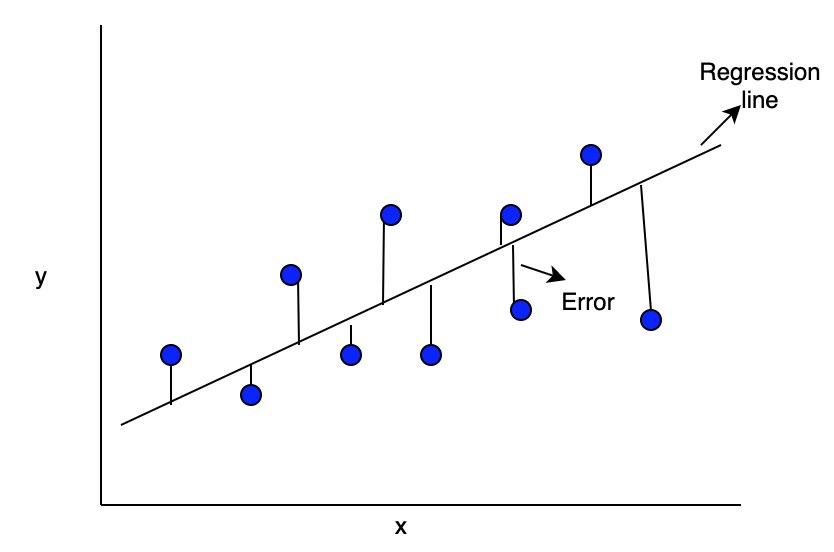

-- Normality of errors can be checked using techniques such as Q-Q plots, histograms of residuals, or formal statistical tests like the Shapiro-Wilk test.

### Method 1: KDE Plot

In statistics, kernel density estimation (KDE), a density plot is a representation of the distribution of a numeric variable.

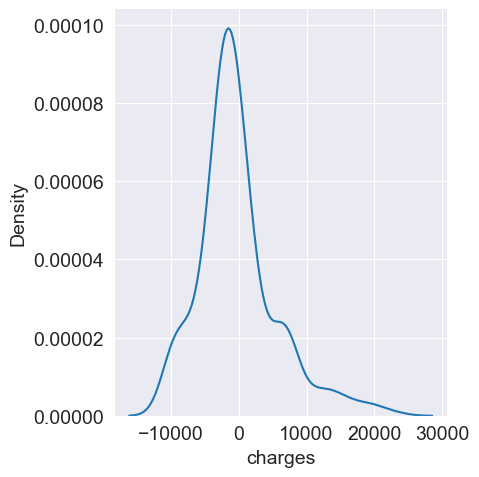

In [37]:
sns.displot(residual,kind='kde')

Inspite of slight bump(minor deviation and ouliers), the errors exhibit a distribution that closely resembles normality, which is favorable.

### Method 2: QQ Plot

A QQ plot is a scatterplot created by plotting two sets of quantiles against one another. If the two distributions that we are comparing are exactly equal, then the points on the Q-Q plot will perfectly lie on a straight line y = x. A Q-Q plot tells us whether a data set is normally distributed.

In [38]:
import scipy as sp

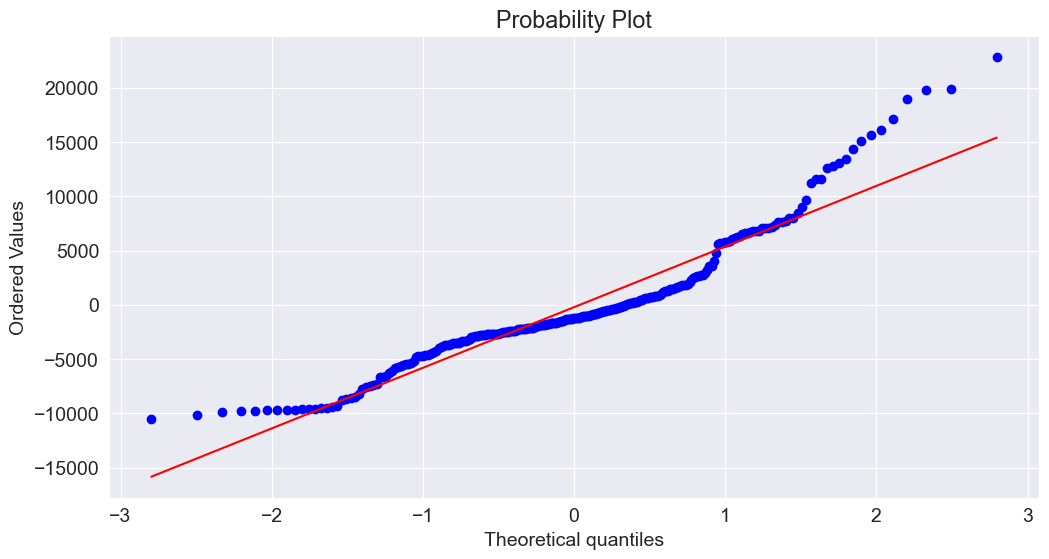

In [41]:
fig, ax = plt.subplots(figsize=(12,6))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

Except few outliers, the Q-Q Plot closely aligns with the reference line, suggesting a near-normal distribution of residuals.

## 4. Homoscedasticity Among the Data

The variance of the errors should be constant across all levels of the independent variables. In simpler terms, the spread of the residuals should remain constant as the values of the predictors change. This assumption can be checked by plotting residuals against fitted values or predictors. 

If the spread of the residuals increases or decreases systematically with the predictors, it suggests heteroscedasticity (not preferable).

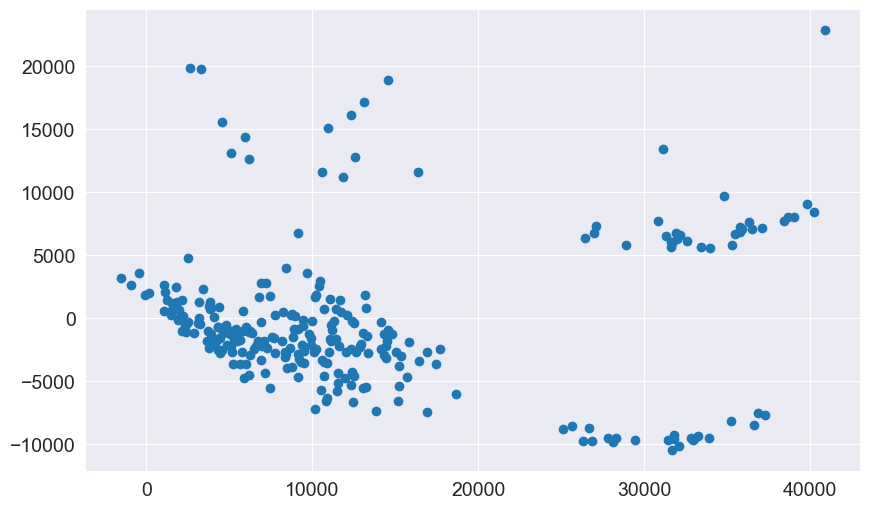

In [42]:
plt.scatter(test_pred, residual)

Since, the spread of the residuals doesn't have any significant increases or decreases with the test predictor, it suggests hemoscedasticity among data.

## 5. No Autocorrelation of Residuals

Autocorrelation refers to the correlation of a variable with itself over successive time intervals or observations. It implies that the residuals, which are the differences between observed and predicted values, should not exhibit any systematic patterns when plotted against time or the sequence of observations. 

The presence of correlation in error terms drastically reduces model’s accuracy. This usually occurs in time series models where the next instant is dependent on previous instant. If the error terms are correlated, the estimated standard errors tend to underestimate the true standard error.

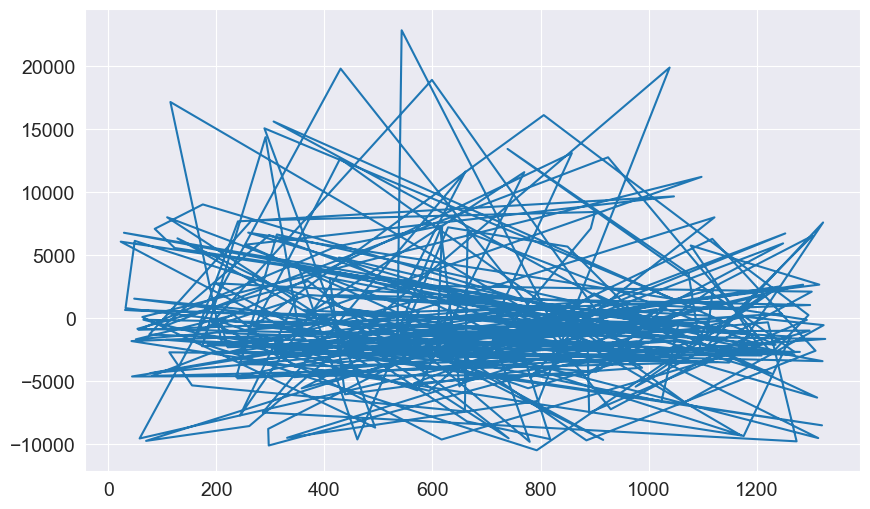

In [43]:
plt.plot(residual)

Clearly, there is no pattern/ correlation present in the residual points.

## Linear Regression Models Implementation

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor

In [24]:
lr = LinearRegression()
rr = Ridge()
las = Lasso()
sgd = SGDRegressor(penalty= "elasticnet", l1_ratio= 0.20)

In [25]:
clfs = { 
    "LinearRegression": lr,
    "Ridge": rr,
    "Lasso": las,
    "SGDRegressor" :sgd
}

## Creating Pipeline

**Pipeline Vs make_pipeline**

Pipeline requires naming of steps, make_pipeline does not.

(Same applies to ColumnTransformer vs make_column_transformer)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [83]:
pipe.fit(train_inputs, train_target)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1]),
                                                 ('ohe_smoker',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [4]),
                                                 ('ohe_region',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 8, None))])),
                ('clf', LinearRegression())])

In [84]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                                                sparse_output=False),
                                  [1]),
                                 ('ohe_smoker',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                                                sparse_output=False),
                                  [4]),
                                 ('ohe_region',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                                                sparse_output=False),
                                  [5])]),
 'trf2': ColumnTransformer(transformers=[('scale', MinMaxScaler(), sli

In [27]:
def train_model(clf, train_inputs, train_target, test_inputs, test_target):
    pipe = Pipeline([
        ("trf1", trf1),
        ("trf2", trf2),
        ("clf", clf)
    ])
    
    pipe.fit(train_inputs, train_target)

    test_pred = pipe.predict(test_inputs)

    r2score = r2_score(test_target,test_pred)
    
    return r2score

In [32]:
%%time

r2scores = []

for name , clf in clfs.items():
    
    score = train_model(clf, train_inputs, train_target, test_inputs, test_target)
    
    print("For: ", name)
    print("R2Score: ", score)

    r2scores.append(score)

For:  LinearRegression
R2Score:  0.7835929767120723
For:  Ridge
R2Score:  0.7831720315390666
For:  Lasso
R2Score:  0.7835213009949491
For:  SGDRegressor
R2Score:  0.7825921987602934
Wall time: 85.5 ms


In [34]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'R2Score': r2scores}).sort_values('R2Score',ascending=False)
performance_df

,Algorithm,R2Score
0,LinearRegression,0.783593
2,Lasso,0.783521
1,Ridge,0.783172
3,SGDRegressor,0.782592


In conclusion, a comparison of the R-squared scores for different regression models reveals that both Linear Regression and Lasso outperform Ridge and SGDRegressor in explaining the variance in the target variable. These higher R-squared scores indicate that Linear Regression and Lasso models provide a better fit to the dataset, capturing more of the variability in the dependent variable. Further analysis and fine-tuning may be conducted to optimize the chosen model's performance for specific requirements.

## Find optimal tuning parameters for the Lasso Pipeline

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
lasso_pipe = Pipeline([
        ("trf1", trf1),
        ("trf2", trf2),
        ("lasso", las)
    ])

In [39]:
param_grid = {
    'lasso__alpha': [0.1, 1.0, 10, 100, 1000]
}

grid_search = GridSearchCV(lasso_pipe, param_grid, cv=10)
grid_search.fit(train_inputs, train_target)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'lasso__alpha': 10}


In [71]:
lasso = Lasso(alpha=10)

In [72]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('clf', lasso)
])

In [73]:
pipe.fit(train_inputs, train_target)


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1]),
                                                 ('ohe_smoker',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [4]),
                                                 ('ohe_region',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 8, None))])),
                ('clf', Lasso(alpha=10))])

In [74]:
test_pred = pipe.predict(test_inputs)

In [75]:
r2_score(test_target,test_pred)

0.7828556606717498

## Polynomial Regression

In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [64]:
train_inputs

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [70]:
# Assuming 'ohe_sex', 'ohe_smoker', and 'ohe_region' are one-hot encoded columns
num_features = train_inputs.columns.difference(['sex', 'smoker', 'region'])

# Polynomial transformation for numerical features only
poly_transformer = ColumnTransformer(
    transformers=[
        ('num', PolynomialFeatures(degree=2, include_bias=True), num_features),
        ("ohe_sex", OneHotEncoder(sparse_output= False, handle_unknown="ignore", drop= "first"),[1]),
        ("ohe_smoker", OneHotEncoder(sparse_output= False, handle_unknown="ignore", drop= "first"),[4]),
        ("ohe_region", OneHotEncoder(sparse_output= False, handle_unknown="ignore", drop= "first"),[5]),
    ]
)

# Linear regression as the final step
poly_lr_pipe = Pipeline([
    ('poly_features', poly_transformer),
    ('linear_regression', LinearRegression())
])

# Fit the pipeline
poly_lr_pipe.fit(train_inputs, train_target)

# Predict on the test set
test_pred = poly_lr_pipe.predict(test_inputs)

# Evaluate the model
r2score = r2_score(test_target, test_pred)
print(f"R2 Score: {r2score}")

R2 Score: 0.7802200772760516


I have successfully executed and evaluated a range of linear models for the project. The performed linear models include `Linear Regression`, `Lasso Regression`, `Ridge Regression`, `Polynomial Regression` and `SGDRegressor`. The evaluation was based on the 

`R-squared score`, providing a comprehensive understanding of the models' performance in explaining the variance in the target variable.

> Stay tuned for Logistic Regression and Don't forget to **Star** this Github Repository for more such contents and consider **sharing** with others.